# CLUSTERING PENGUNJUNG MALL BERDASARKAN PENDAPATAN TAHUNAN DAN SPENDING SCORE

In [ ]:
## import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering


dataset = pd.read_csv('D:\Mall_Customers.csv')

##EKSPLORASI DATA

##banyaknya jumlah customer wanita dibanding pria dpt menjadi elemen penting dalam segmentasi customer
sns.countplot(x='Genre', data=dataset)
plt.title('Distribution of Gender')


DISTRIBUSI GENDER PENGUNJUNG

>>banyaknya jumlah customer wanita (115) dibandingkan pria (85) dapat menjadi elemen penting dalam segmentasi customer

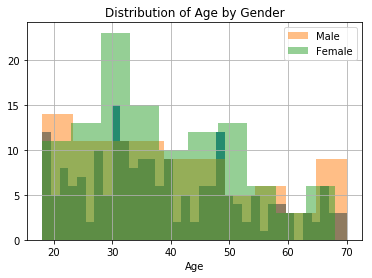

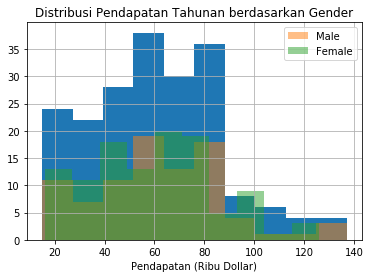

In [4]:
# Histogram dari data umur pelanggan
dataset.hist('Age', bins=35)
plt.title('Distribution of Age')
plt.xlabel('Age')

#Histogram usia dilihat dari gendernya
plt.hist('Age', data=dataset[dataset['Genre'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Age', data=dataset[dataset['Genre'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

#Histogram pendapatan tahunan
dataset.hist('Annual Income (k$)')
plt.title('Distribusi Pendapatan Tahunan dalam Dollar')
plt.xlabel('Ribu Dollar')

#Histogram pendapatan dilihat dari gender
plt.hist('Annual Income (k$)', data=dataset[dataset['Genre'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Annual Income (k$)', data=dataset[dataset['Genre'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribusi Pendapatan Tahunan berdasarkan Gender')
plt.xlabel('Pendapatan (Ribu Dollar)')
plt.legend()

HISTOGRAM USIA PENGUNJUNG MENURUT GENDER
>>berdasarkan dataset ini, mayoritas pria yang berbelanja berusia lebih muda dibandingkan wanita. Juga terdapat lebih banyak wanita paruh baya dibandingkan pria paruh baya yang berkunjung.

PENDAPATAN BERDASARKAN GENDER
>>berdasarkan dataset ini, wanita menghasilkan uang lebih sedikit dibandingkan pria, untuk melihat bagaimana spending score keduanya maka kita bandingkan nilai rata-rata spending score-nya.

48.51136363636363
51.526785714285715


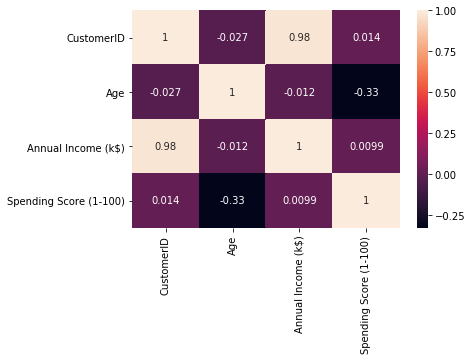

In [5]:
#Perbandingan spending score wanita dan pria
male_dataset = dataset[dataset['Genre'] == 'Male']
female_dataset = dataset[dataset['Genre'] == 'Female']

print(male_dataset['Spending Score (1-100)'].mean())
print(female_dataset['Spending Score (1-100)'].mean())
##hasilnya rata-rata spending score wanita 48.5 dan pria 51.5, wanita memiliki pendapatan lbh rendah tetapi menghabiskan uang lebih banyak di mall ini

#Heatmap korelasi dari semua variable
sns.heatmap(dataset.corr(), annot=True)

print('')

#Satu-satunya variabel yang dapat berkorelasi adalah variabel umur dan spending score. Dapat dilihat bahwa korelasinya bernilai negatif artinya semakin tua umur pengunjung dalam dataset maka semakin rendah spending scorenya. Dan karena bernilai 0,33 maka bukan korelasi yang kuat

In [7]:
X = dataset.iloc[:, [3, 4]].values

print('--------------------------DATA-------------------------')
print(dataset.head())

from sklearn.preprocessing import LabelEncoder
print('\n')


--------------------------DATA-------------------------
   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40




In [9]:
print('----------------------Transformasi---------------------')
encode = LabelEncoder()
encoded_sex=encode.fit_transform(dataset.iloc[:, 1])
print(encoded_sex)
dataset['Genre']=encoded_sex
print('\n')
print('---------------Data Sudah Ditransformasi---------------')
print(dataset.head())

----------------------Transformasi---------------------
[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


---------------Data Sudah Ditransformasi---------------
   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40




---------------Menghitung Jumlah Klaster---------------


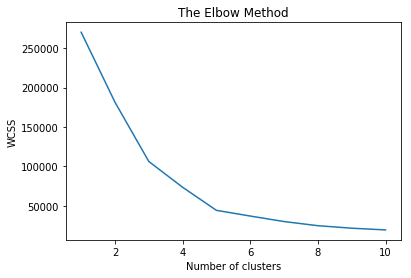

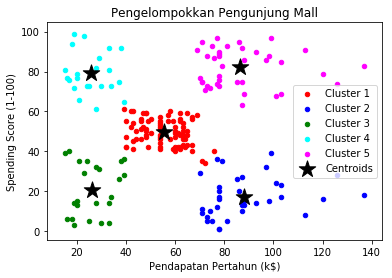

In [10]:
print('\n')
print('---------------Menghitung Jumlah Klaster---------------')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', marker='*', label = 'Centroids')
plt.title('Pengelompokkan Pengunjung Mall')
plt.xlabel('Pendapatan Pertahun (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

MENENTUKAN JUMLAH CLUSTER
>>Jelas dari gambar bahwa kita harus mengambil jumlah cluster sama dengan 5, karena kemiringan kurva tidak cukup curam setelahnya.

Cluster 1  Pengunjung dengan pendapatan 	menengah dan spending score 	menengah.
Cluster 2  Pengunjung dengan pendapatan 	tinggi  dan spending score rendah.
Cluster 3  Pengunjung dengan pendapatan 	rendah dan spending score rendah.
Cluster 4  Pengunjung dengan pendapatan 	rendah dan spending score tinggi.
Cluster 5  Pengunjung dengan pendapatan 	tinggi dan spending score tinggi.




---------------------HIERARCHIAL CLUSTERING--------------------




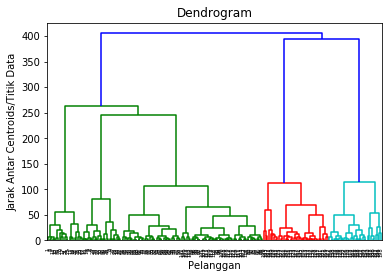

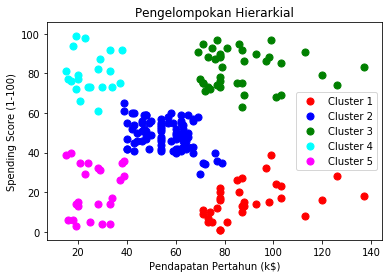

In [11]:
print('\n')
print('---------------------HIERARCHIAL CLUSTERING--------------------')
print('\n')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Pelanggan')
plt.ylabel('Jarak Antar Centroids/Titik Data')
plt.show()

# 3. Fitting Hierarchical Clustering to the dataset--

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# 4. Visualising the clusters--

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Pengelompokan Hierarkial')
plt.xlabel('Pendapatan Pertahun (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()